<a href="https://colab.research.google.com/github/alruba/ASSIGNMENT/blob/master/Flow_Based_Generative_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Normalizing Flows** 

##### So far there has been a buzz about Flow Based GEnerative Modelling, in the market. To further understand this, we need to get to know the generative modelling and how does it work. To understand generative modelling you can visit this link for a general definition, https://searchenterpriseai.techtarget.com/definition/generative-modeling

# ***Types of Generative Models***

##### There are 3 types of generative models:
1. Generative Adversarial Networks (GANs), used in unsupervised learning, Generator generates the data instances in Latent space and the discriminator finds the real or fake data instances generated by the generator.

2. Variational Autoencoders (VAEs), its main purpose is to maximize the evidence of lower bound (ELBO) by optimizing the log-likelihood of the data.

3. Flow based generative models, it is constructed by a sequence of invertible transformations. Unlike other two, the model explicitly learns the data distribution $p(\mathbf{x})$ nd therefore the loss function is simply the negative log-likelihood.

###*** Let us now dive into the basic concepts of linear algebra. ***

***Jacobian Matrix***

##### Given a function mapping of input vector **x** of dimension *n* to a *m*-dimensional output vector, such that $\mathbf{f}: \mathbb{R}^n \mapsto \mathbb{R}^m$. Matrix of all first order partial derivatives of this function *f* is called a Jacobian Matrix **J**, where an entry on i-th row and j-th column is $\mathbf{J}_{ij} = \frac{\partial f_i}{\partial x_j}$.

<p>
$\mathbf{J} = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_n} \\[6pt]
\vdots & \ddots & \vdots \\[6pt]
\frac{\partial f_m}{\partial x_1} & \dots & \frac{\partial f_m}{\partial x_n} \\[6pt]
\end{bmatrix}$




***Determinant***

The determinant is one real number computed as a function of all the elements in a squared matrix. *Determinant exists for only square matrices*.

The determinant of a nxn matrix *M* is:

$\det M = \det \begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & & \vdots \\
a_{n1} & a_{n2} & \dots & a_{nn} \\
\end{bmatrix} = \sum_{j_1 j_2 \dots j_n} (-1)^{\tau(j_1 j_2 \dots j_n)} a_{1j_1} a_{2j_2} \dots a_{nj_n}$

where the subscript under the summation *j1j2…jn* are all permutations of the set {1, 2, …, n}, so there are n! items in total;  τ(.) indicates the signature of a permutation.

**Note:** 

1.  If $\left\vert M \right\vert$ = 0, then M is singular.
2.  If $\left\vert M \right\vert$ $\neq$ 0, then M is not singular.
3. M$^{-1}$ of M exists only if M is non-singular.
4. The determinant of the product is equivalent to the product of the determinants: det(AB)=det(A)det(B)





# **What is Normalizing Flow?**

It is a technique used in machine learning to build complex probablity distributions by transforming simple ones. 

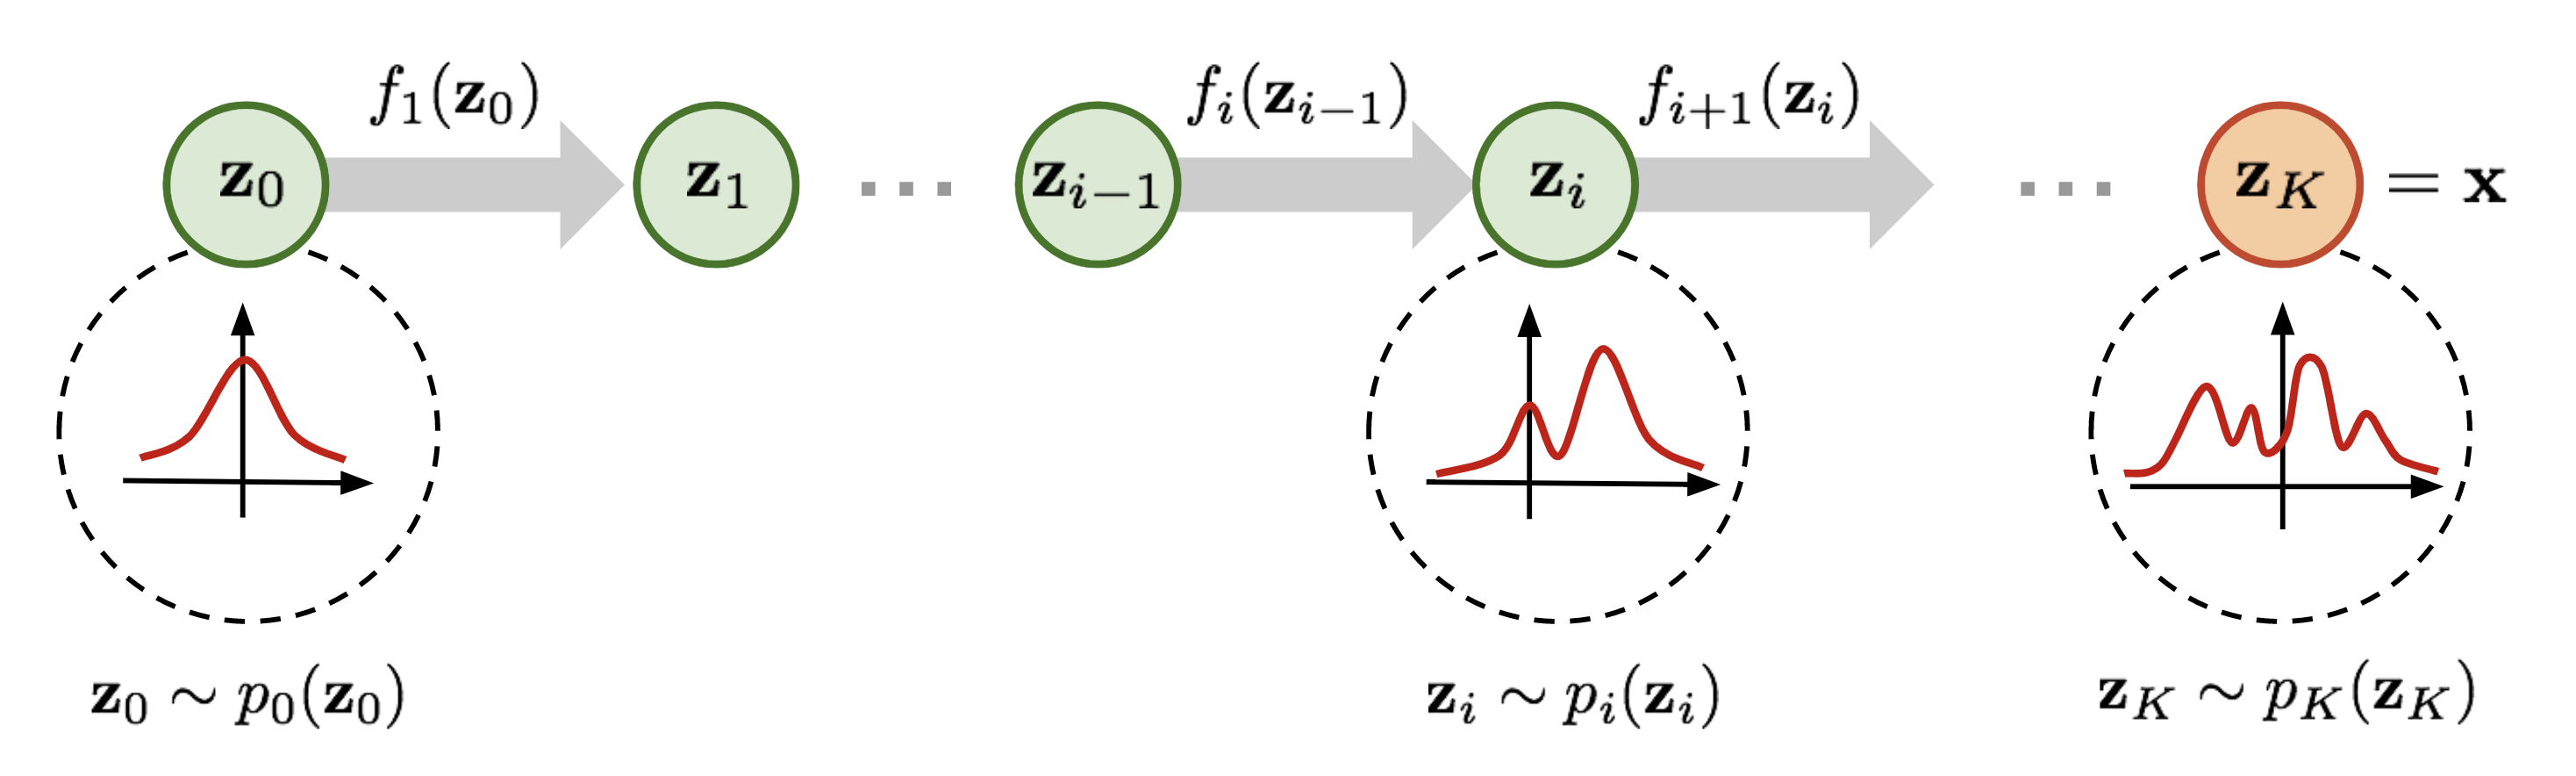






Suppose we have a random variable *z* 

$\mathbf{z}$  $\sim p_{\theta}$$(\mathbf{z})$ 

with simple distribution like spherical Gaussian

$\mathbf{x}$ = $f_{\theta}$$(\mathbf{z})$

[ We use a sequence of invertible transformation i.e. f, to make it more complicated]

$ f_{\theta}$$(\mathbf{z})$ = $ f_{k}$°......$ f_{2}$$(\mathbf{z})$°$ f_{1}$$(\mathbf{z})$

The overall transformation shown above is invertible.

We can say that,

$p_{\theta}$$(\mathbf{x})$ = $p_{\theta}$$({f_{\theta}^{-1}}$(x)$)$, but this is wrong as the probability distribution depends on the behavior of the function $\mathbf{f}$.

So, basically $\mathbf{f} : \mathbf{Z} \rightarrow \mathbf{X}$, where $\mathbf{z}$ and $\mathbf{x}$ are domains and $\mathbf{f}$ is invertible.

$p_{\theta}(z)$ is defined over $z$ $\in$ $Z$



# **Change of Variable Formula**

From above, the question arises how to infer the unknown probability density function of the new variable $p_{\theta}$$(\mathbf{x})$

Given a random variable ${z}$ and its known probability density function $z \sim \pi(z)$,  we would like to construct a new random variable using a 1-1 mapping function $x = f(z)$. The function $f$ is invertible, so $z=f^{-1}(x)$

\begin{aligned}
& \int p(x)dx = \int \pi(z)dz = 1 \scriptstyle{\text{   ; Definition of probability distribution.}}\\
& p(x) = \pi(z) \left\vert\frac{dz}{dx}\right\vert = \pi(f^{-1}(x)) \left\vert\frac{d f^{-1}}{dx}\right\vert = \pi(f^{-1}(x)) \vert (f^{-1})'(x) \vert
\end{aligned}

By definition, the integral $\int \pi(z)dz$ s the sum of an infinite number of rectangles of infinitesimal width $\Delta z$. The height of such a rectangle at position z is the value of the density function $\pi(z)$. When we substitute the variable, $z = f^{-1}(x)$ yields $\frac{\Delta z}{\Delta x} = (f^{-1}(x))'$ and $\Delta z =  (f^{-1}(x))' \Delta x$. Here $\vert(f^{-1}(x))'\vert$ indicates the ratio between the area of rectangles defined in two different coordinate of variables $z$ and $x$ respectively.

The multivariable version has a similar format:


> $\begin{aligned}
\mathbf{z} &\sim \pi(\mathbf{z}), \mathbf{x} = f(\mathbf{z}), \mathbf{z} = f^{-1}(\mathbf{x}) \\
p(\mathbf{x}) 
&= \pi(\mathbf{z}) \left\vert \det \dfrac{d \mathbf{z}}{d \mathbf{x}} \right\vert  
= \pi(f^{-1}(\mathbf{x})) \left\vert \det \dfrac{d f^{-1}}{d \mathbf{x}} \right\vert
\end{aligned}$

where $\det \frac{\partial f}{\partial\mathbf{z}}$ is the Jacobian determinant of the function $f$.


### Note:


1.   A valid probability density function must always integrate one over its domain.
2.   $\det \frac{\partial f}{\partial\mathbf{z}}$ basically indicates how much a transformation locally expands or contracts the space.
3. Triangular jacobians are preferred over normal ones as they are easy to compute and are cost effective.


To conclude, normalizing flow is all about learning to approximate some observed data distribution (images, speech audio) and these can be used to sample new data points with similar characteristics to training data.




